In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot

In [15]:
# create data
X_data = np.random.random(1000).astype(np.float32)
y_data = 0.3 * X_data + 0.3

X_train, X_test = np.split(X_data, [900])
y_train, y_test = np.split(y_data, [900])

y_train = y_train.reshape([900, 1])
y_test = y_test.reshape([100, 1])


In [26]:
# create tensorflow structure
Weights = tf.Variable(tf.random_uniform([1,1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

print(X_train.shape)
print(Weights)
print(biases)

y_predict = tf.matmul(X_train.reshape([900,1]), Weights) + biases

print(y_predict)
# print(y_train)

loss = tf.reduce_mean(tf.square(y_predict - y_train))
optimizer = tf.train.GradientDescentOptimizer(0.4)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

(900,)
<tf.Variable 'Variable_18:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'Variable_19:0' shape=(1,) dtype=float32_ref>
Tensor("add_1:0", shape=(900, 1), dtype=float32)


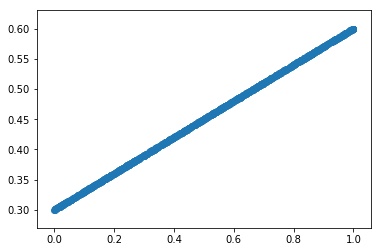

0 0.410639 [[-0.33481717]] [ 0.]
20 0.0013282 [[ 0.17482831]] [ 0.36629885]
40 0.00015066 [[ 0.25784257]] [ 0.32232925]
60 1.70898e-05 [[ 0.2858015]] [ 0.30752045]
80 1.93854e-06 [[ 0.29521799]] [ 0.30253288]
100 2.19884e-07 [[ 0.29838946]] [ 0.30085304]
120 2.49433e-08 [[ 0.29945758]] [ 0.30028734]
140 2.82932e-09 [[ 0.29981732]] [ 0.30009678]
160 3.21087e-10 [[ 0.29993847]] [ 0.30003262]
180 3.6487e-11 [[ 0.29997927]] [ 0.30001101]
200 4.1478e-12 [[ 0.29999301]] [ 0.30000371]
220 4.5784e-13 [[ 0.29999769]] [ 0.30000123]
240 5.49921e-14 [[ 0.29999921]] [ 0.30000043]
260 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
280 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
300 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
320 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
340 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
360 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
380 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
400 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
420 6.82812e-15 [[ 0.29999974]] [ 0.30000016]
440 6.82812e

In [27]:
config = tf.ConfigProto(device_count = {'GPU': 1})
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

sess.run(init) # very important

fig = plot.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_data, y_data)
plot.show()

for step in range(1001):
    if step % 20 == 0:
        print(step, sess.run(loss), sess.run(Weights), sess.run(biases))
    sess.run(train)

sess.close()
    